In [29]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
dataset = pd.read_csv('StressLevelDataset.csv')
dataset

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [31]:
X = dataset.drop('stress_level', axis=1)
X

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3
1096,9,12,0,8,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3
1097,4,26,0,3,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1
1098,21,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4


In [32]:
y = dataset['stress_level']
y

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 221it [00:43,  3.89it/s]                                                               


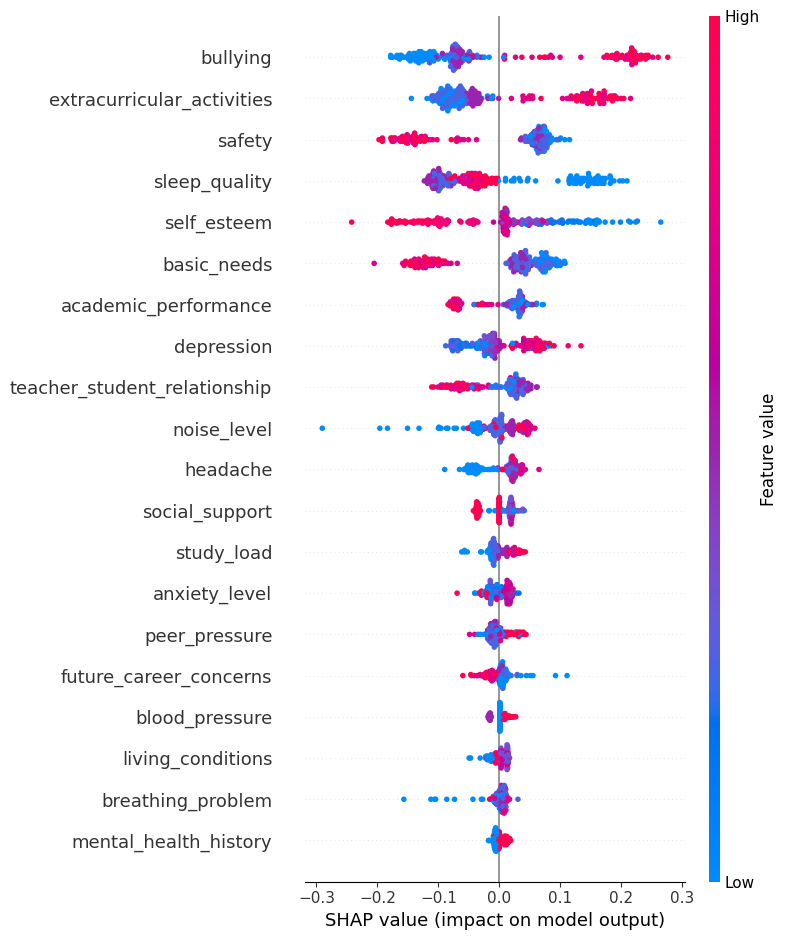

In [35]:
shap.summary_plot(shap_values, X_test)

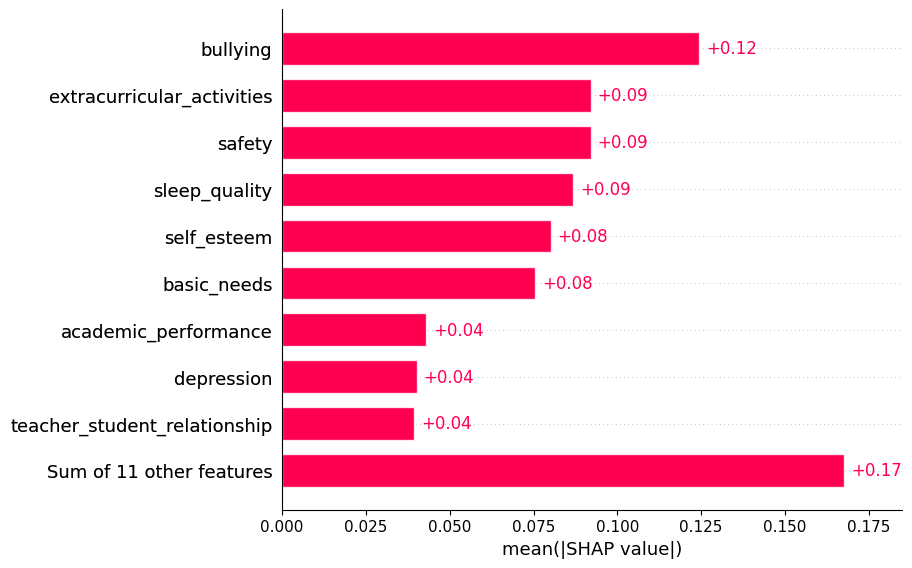

In [36]:
shap.plots.bar(shap_values)

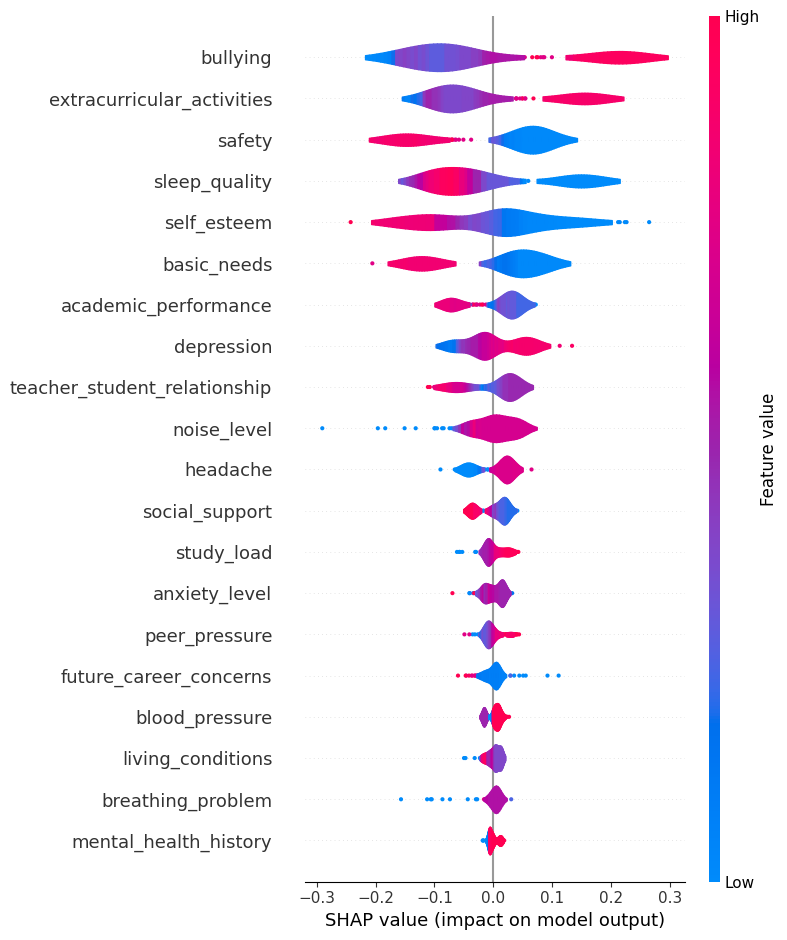

In [37]:
shap.summary_plot(shap_values, plot_type='violin')